In [1]:
from HistoryMatching.ReadFiles import ReadObsFile
from HistoryMatching.Utils import CVAE_function,GetFaciesData,Plot_Result,Contitional_ES_MDA
from HistoryMatching.Utils import Load_Ensemble,GerenateObsFile,CreateStateFacies,UpdateStateFacies
import numpy as np

/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load Ensemble Data

In [2]:
Facies=Load_Ensemble(pathFile='DataSet/MPS-100.mat',variable='Dato')

# Generate Measurement

In [3]:
GenerateMeasurement=True
import scipy.io as sio
True100 = sio.loadmat('DataSet/True100.mat')
True100 = True100['True']
if GenerateMeasurement:
    ""
    ""
    xp = [10,58,97,18,69] # produtor well
    yp = [ 9,7 ,23,91,83] # produtor well
    xi = [29,64]        # injetor well
    yi = [44,50]        # injetor well
    position=np.array([yp+yi] + [xp+xi]).T
    obs=GerenateObsFile(position,True100,dim_shape=[100,100])
    print(obs)

[1, 1, 0, 1, 1, 1, 1]


# Test #1
<ul>
    <li> File utilizado: 'Obs.dat' </li>
        <ul>
            <li> xp = [10,58,97,18,69] - Poço produtor </li>
            <li> yp = [ 9,7 ,23,91,83] - Poço produtor </li>
            <li> xi = [29,64] - Poço injetor </li>
            <li> yi = [44,50] - Poço injetor </li>
        </ul>
    </li>
    <li> position = np.array([yp+yi] + [xp+xi]).T </li>
</ul>
    

## Read Observation File

In [4]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs.dat')

## Generate parameterized Facies data

In [5]:
m_x = CreateStateFacies(Facies,100,100,redeVAE='Model/TrainModel/CVAE100'); # facies em DL

Using TensorFlow backend.
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Reconstucted Initial Facies data

In [6]:
m_f = UpdateStateFacies(m_x,100,100,redeVAE='Model/TrainModel/CVAE100')

## Execute ES-MDA for generate Contidional Sampling

In [7]:
m_f_a=Contitional_ES_MDA(8,[],position,obs,R,m_x,m_f,[100,100],redeVAE='Model/TrainModel/CVAE100')

Erro ite_ 0  :  864.0
Erro ite_ 1  :  467.0
Erro ite_ 2  :  201.0
Erro ite_ 3  :  78.0
Erro ite_ 4  :  54.0
Erro ite_ 5  :  24.0
Erro ite_ 6  :  26.0
Erro ite_ 7  :  22.0
Erro End:  19.0


## Plot True Model and Result

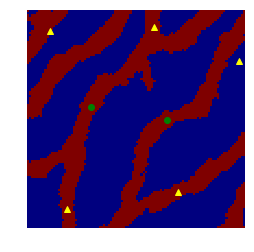

In [8]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True100.reshape((100,100)),cmap='jet')
plt.plot(xp,yp,'^',color='yellow')
plt.plot(xi,yi,'o',color='green')
plt.axis('off')
plt.show()

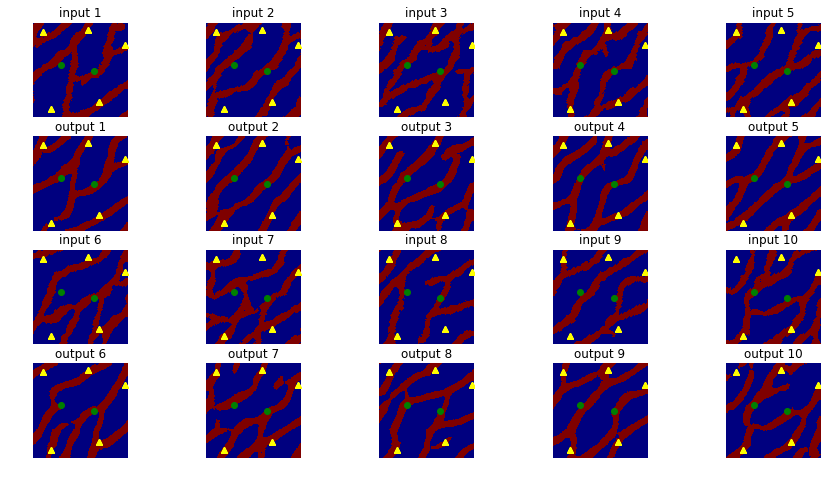

In [9]:
Plot_Result(Facies,m_f_a,xp,yp,xi,yi,initial_data=0,shape=[100,100]) 

# Teste 2

<ul>
    <li> Arquivo utilizado: 'Obs2.dat' </li>
    <li> Pontos utilizados:
        <ul>
            <li> xe = [4, 16,36,66,81,88,20,44,62,80,44] </li>
            <li> ye = [80,68,60,28,50,20,51,44,10,90,36]] </li>
            <li> xi = [] </li>
            <li> yi = [] </li>
        </ul>
    </li>
    <li> position = np.array([ye] + [xe]).T </li>
</ul>

In [10]:
GenerateMeasurement=True
import scipy.io as sio
True100 = sio.loadmat('DataSet/True100.mat')
True100 = True100['True']
if GenerateMeasurement:
    ""
    ""
    xe = [4, 16,36,66,81,88,20,44,62,80,44]
    ye = [80,68,60,28,50,20,51,44,10,90,36]
    position=np.array([ye] + [xe]).T
    obs=GerenateObsFile(position,True100,filePath='Obs2.dat',dim_shape=(100,100))
    print(obs)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


## Read Observation File

In [11]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs2.dat')

## Generate parameterized Facies data

In [12]:
m_x = CreateStateFacies(Facies,100,100,redeVAE='Model/TrainModel/CVAE100'); # facies em DL

## Reconstucted Initial Facies data


In [13]:
m_f = UpdateStateFacies(m_x,100,100,redeVAE='Model/TrainModel/CVAE100')

## Execute ES-MDA for generate Contidional Sampling

In [14]:
m_f_a=Contitional_ES_MDA(8,[],position,obs,R,m_x,m_f,[100,100],redeVAE='Model/TrainModel/CVAE100')

Erro ite_ 0  :  868.0
Erro ite_ 1  :  406.0
Erro ite_ 2  :  145.0
Erro ite_ 3  :  84.0
Erro ite_ 4  :  59.0
Erro ite_ 5  :  39.0
Erro ite_ 6  :  19.0
Erro ite_ 7  :  16.0
Erro End:  21.0


## Plot True Model and Result

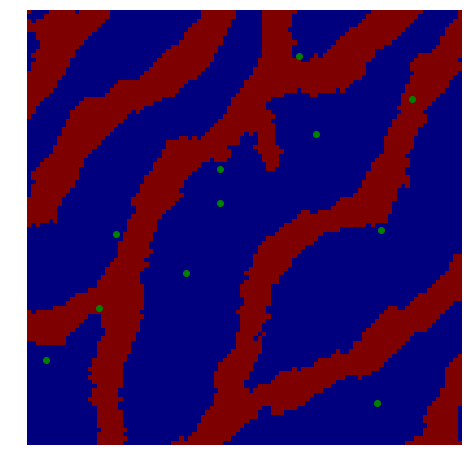

In [15]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True100.reshape((100,100)),cmap='jet')
plt.plot(xe,ye,'o',color='green')
plt.axis('off')
plt.show()

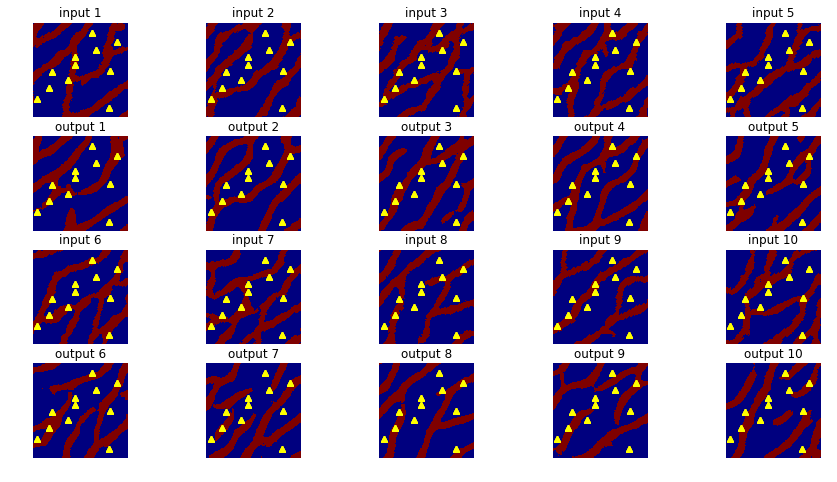

In [16]:
Plot_Result(Facies,m_f_a,xe,ye,[],[],initial_data=0,shape=[100,100]) 